In [1]:
%matplotlib inline
import pandas as pd

In [2]:
titles=pd.read_csv('titles.csv',index_col=None)
titles.head()

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


In [3]:
cast=pd.read_csv('cast.csv',index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


# 1.Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [2]:
import pandas as pd
cast=pd.read_csv('cast.csv',index_col=None)
superman_batman_roles = cast[(cast['character'].str.contains('Superman', case=False)) | (cast['character'].str.contains('Batman', case=False))]
pivot_table = superman_batman_roles.pivot_table(index='year', columns='character', values='type', aggfunc='count', fill_value=0)

# Filter years where Superman characters outnumber Batman characters
superman_years = pivot_table[pivot_table['Superman'] > pivot_table['Batman']]

# Count the number of Superman years
num_superman_years = len(superman_years)
print("Number of Superman years:", num_superman_years)


Number of Superman years: 11


# 2.How many years have been "Batman years", with more Batman characters than Superman characters?

In [1]:
import pandas as pd
cast=pd.read_csv('cast.csv',index_col=None)
superman_batman_roles = cast[(cast['character'].str.contains('Superman', case=False)) | (cast['character'].str.contains('Batman', case=False))]

# Create a pivot table to count the number of Superman and Batman characters by year
pivot_table = superman_batman_roles.pivot_table(index='year', columns='character', values='type', aggfunc='count', fill_value=0)

# Filter years where Batman characters outnumber Superman characters
batman_years = pivot_table[pivot_table['Batman'] > pivot_table['Superman']]

# Count the number of Batman years
num_batman_years = len(batman_years)
print("Number of Batman years:", num_batman_years)


Number of Batman years: 27


# 3.Plot the number of actor roles each year and the number of actress roles each year over the history of film.

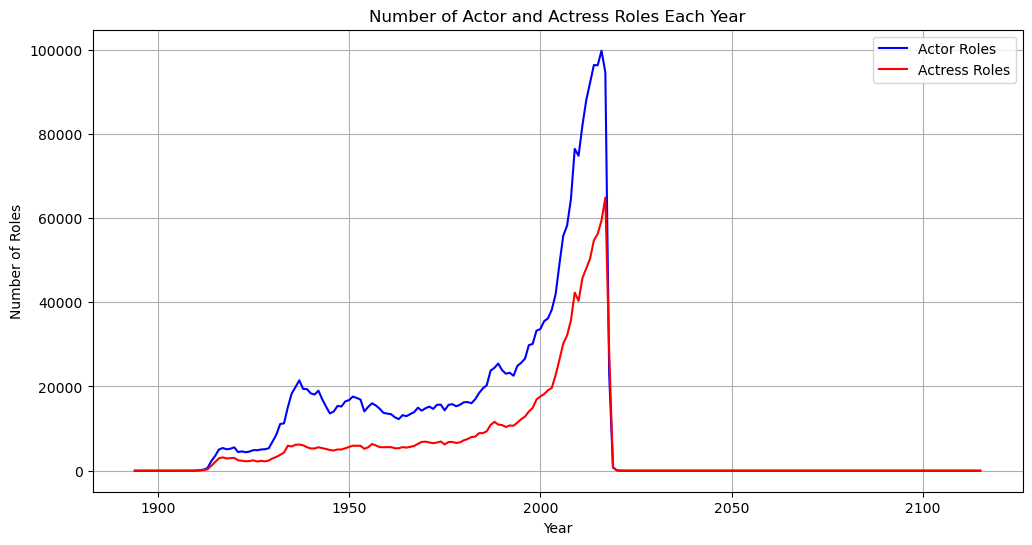

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
cast=pd.read_csv('cast.csv',index_col=None)
roles_by_year = cast.groupby(['year', 'type']).size().unstack(fill_value=0)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the number of actor roles each year
plt.plot(roles_by_year.index, roles_by_year['actor'], label='Actor Roles', color='blue')

# Plot the number of actress roles each year
plt.plot(roles_by_year.index, roles_by_year['actress'], label='Actress Roles', color='red')

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.title('Number of Actor and Actress Roles Each Year')

# Add a legend
plt.legend()
plt.grid(True)
plt.show()


# 4. Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

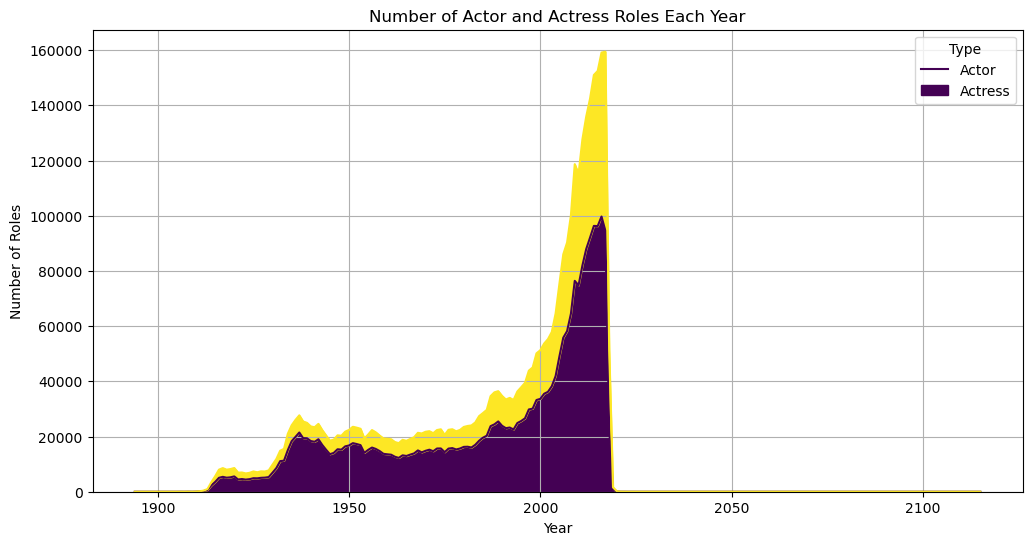

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
roles_by_year = cast.groupby(['year', 'type']).size().unstack(fill_value=0)
roles_by_year.plot(kind='area', stacked=True, figsize=(12, 6), colormap='viridis')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.title('Number of Actor and Actress Roles Each Year')
plt.legend(title='Type', labels=['Actor', 'Actress'])
plt.grid(True)
plt.show()


# 5.Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

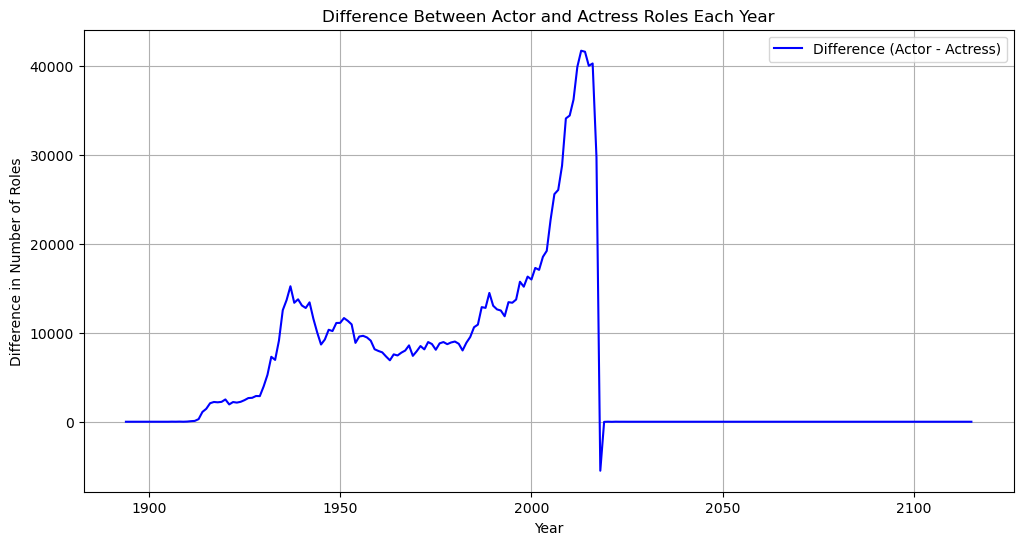

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'cast' with 'year' and 'type' columns.

# Group roles by year and type (actor or actress) and count the number of roles
roles_by_year = cast.groupby(['year', 'type']).size().unstack(fill_value=0)

# Calculate the difference between actor and actress roles each year
difference = roles_by_year['actor'] - roles_by_year['actress']

# Create a plot for the differences
plt.figure(figsize=(12, 6))
plt.plot(difference.index, difference.values, label='Difference (Actor - Actress)', color='blue')

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Difference in Number of Roles')
plt.title('Difference Between Actor and Actress Roles Each Year')

# Show the plot
plt.grid(True)
plt.legend()
plt.show()


# 6.Plot the fraction of roles that have been 'actor' roles each year in the history of film.

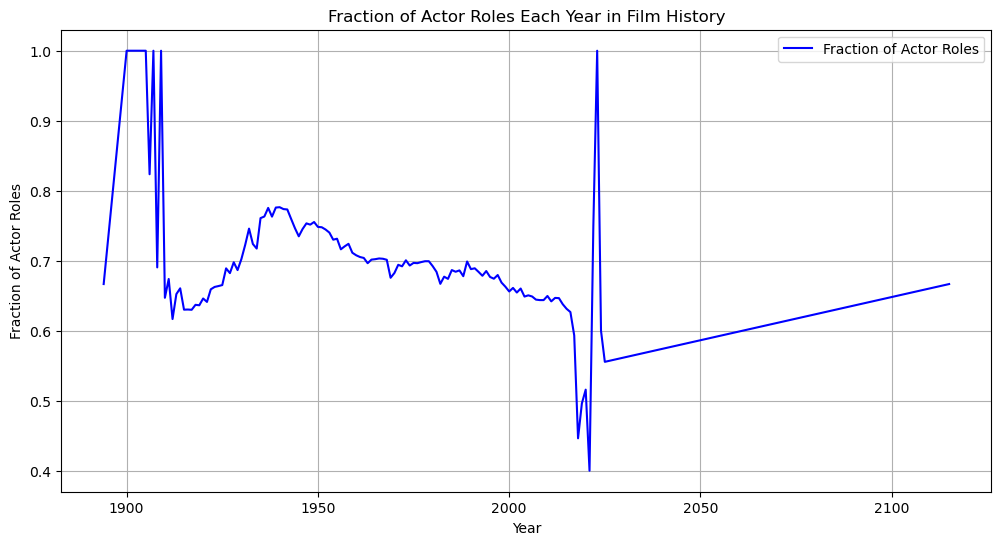

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'cast' with 'year' and 'type' columns.

# Group roles by year and type (actor or actress) and count the number of roles
roles_by_year = cast.groupby(['year', 'type']).size().unstack(fill_value=0)

# Calculate the total number of roles each year
total_roles_by_year = roles_by_year.sum(axis=1)

# Calculate the fraction of 'actor' roles each year
fraction_actor_roles = roles_by_year['actor'] / total_roles_by_year

# Create a plot for the fraction of 'actor' roles each year
plt.figure(figsize=(12, 6))
plt.plot(fraction_actor_roles.index, fraction_actor_roles.values, label='Fraction of Actor Roles', color='blue')

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Fraction of Actor Roles')
plt.title('Fraction of Actor Roles Each Year in Film History')

# Show the plot
plt.grid(True)
plt.legend()
plt.show()


# 7.Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

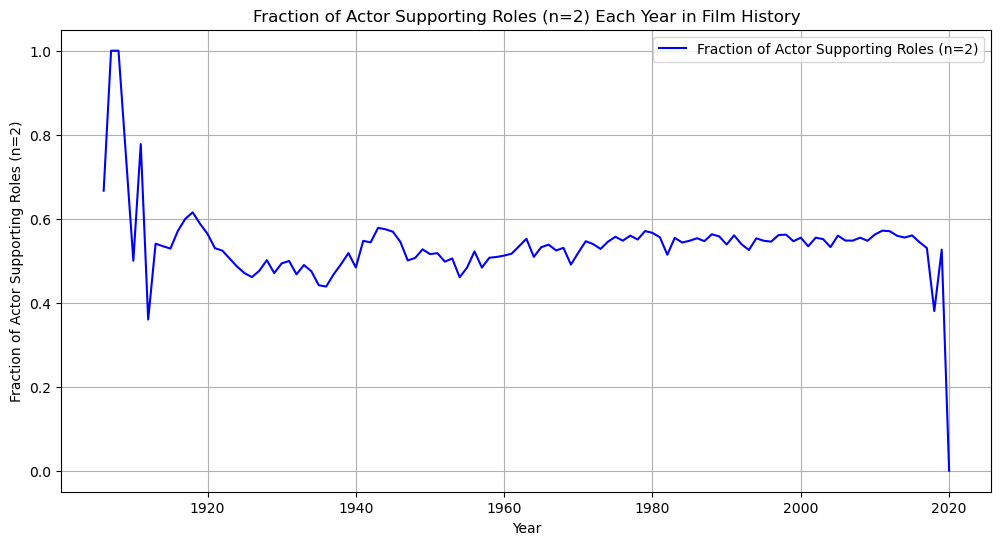

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
supporting_roles = cast[cast['n'] == 2]


supporting_roles_by_year = supporting_roles.groupby(['year', 'type']).size().unstack(fill_value=0)

# Calculate the total number of supporting roles each year
total_supporting_roles_by_year = supporting_roles_by_year.sum(axis=1)

# Calculate the fraction of 'actor' supporting roles each year
fraction_actor_supporting_roles = supporting_roles_by_year['actor'] / total_supporting_roles_by_year

# Create a plot for the fraction of 'actor' supporting roles each year
plt.figure(figsize=(12, 6))
plt.plot(fraction_actor_supporting_roles.index, fraction_actor_supporting_roles.values, label='Fraction of Actor Supporting Roles (n=2)', color='blue')

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Fraction of Actor Supporting Roles (n=2)')
plt.title('Fraction of Actor Supporting Roles (n=2) Each Year in Film History')

# Show the plot
plt.grid(True)
plt.legend()
plt.show()


# 8.Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor roles for each year in the history of film

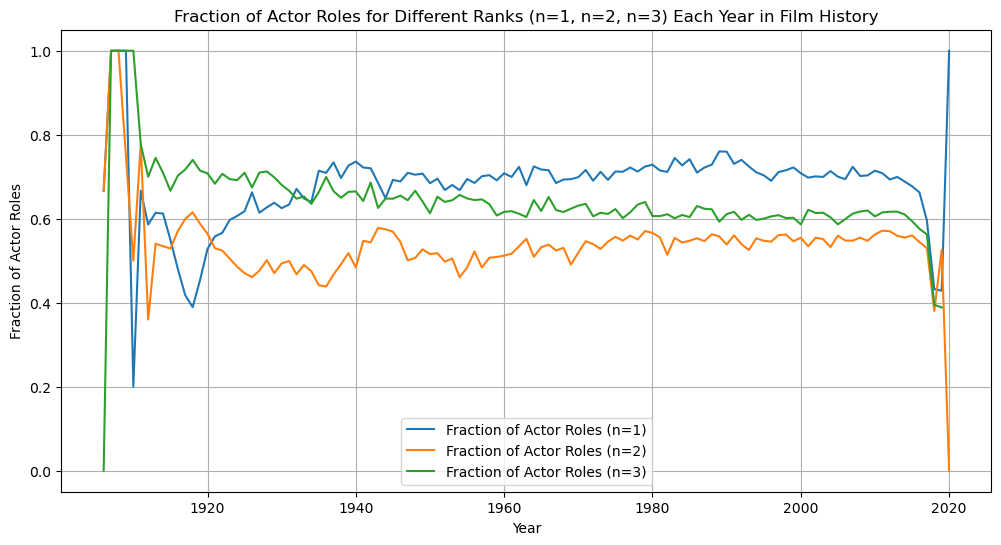

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'cast' with 'year', 'type', and 'n' columns.

# Define the ranks (n=1, n=2, n=3)
ranks = [1, 2, 3]

# Initialize a plot
plt.figure(figsize=(12, 6))

# Iterate through each rank and plot the fraction of 'actor' roles each year
for rank in ranks:
    rank_roles = cast[cast['n'] == rank]
    rank_roles_by_year = rank_roles.groupby(['year', 'type']).size().unstack(fill_value=0)
    
    # Calculate the total number of roles of that rank each year
    total_rank_roles_by_year = rank_roles_by_year.sum(axis=1)
    
    # Calculate the fraction of 'actor' roles of that rank each year
    fraction_actor_rank_roles = rank_roles_by_year['actor'] / total_rank_roles_by_year
    
    # Plot the line for the current rank
    plt.plot(fraction_actor_rank_roles.index, fraction_actor_rank_roles.values, label=f'Fraction of Actor Roles (n={rank})')
plt.xlabel('Year')
plt.ylabel('Fraction of Actor Roles')
plt.title('Fraction of Actor Roles for Different Ranks (n=1, n=2, n=3) Each Year in Film History')
plt.legend()
plt.grid(True)
plt.show()
